In [1]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv('Chocolate Sales.csv') 

In [2]:
# Remove $ and commas, then convert to float
df['Amount'] = df['Amount'].replace(r'[\$,]', '', regex=True).astype(float)


# Total Amount
total_amount = df['Amount'].sum()
print("Total Revenue: $", total_amount)
#Total Boxes 
total_boxes = df['Boxes Shipped'].sum()
print("Total Boxes Shipped: ", total_boxes)
#Total Sales made
count_sales = df['Amount'].count()
print("Total Sales made:", count_sales)




Total Revenue: $ 6183625.0
Total Boxes Shipped:  177007
Total Sales made: 1094


In [3]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


In [4]:
df.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [5]:
#How much money each product generated
product_totals = df.groupby('Product')['Amount'].sum()
print(product_totals)


Product
50% Dark Bites          341712.0
70% Dark Bites          211610.0
85% Dark Bars           299229.0
99% Dark & Pure         299796.0
After Nines             261331.0
Almond Choco            277536.0
Baker's Choco Chips     249613.0
Caramel Stuffed Bars    231588.0
Choco Coated Almonds    241486.0
Drinking Coco           256655.0
Eclairs                 312445.0
Fruit & Nut Bars        259147.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Mint Chip Choco         283969.0
Orange Choco            256144.0
Organic Choco Syrup     294700.0
Peanut Butter Cubes     324842.0
Raspberry Choco         264740.0
Smooth Sliky Salty      349692.0
Spicy Special Slims     293454.0
White Choc              329147.0
Name: Amount, dtype: float64


In [6]:
#How much each sales persons sold
sales_by_person = df.groupby('Sales Person')['Amount'].sum()
print(sales_by_person)
print('---------------------------------')
#How much was sold in each country
sales_by_country = df.groupby('Country')['Amount'].sum()
print(sales_by_country)

Sales Person
Andria Kimpton         201747.0
Barr Faughny           258713.0
Beverie Moffet         278922.0
Brien Boise            312816.0
Camilla Castle         196616.0
Ches Bonnell           320901.0
Curtice Advani         216461.0
Dennison Crosswaite    291669.0
Dotty Strutley         190624.0
Gigi Bohling           232666.0
Gunar Cockshoot        238483.0
Husein Augar           205212.0
Jan Morforth           219667.0
Jehu Rudeforth         220976.0
Kaine Padly            266490.0
Karlen McCaffrey       223895.0
Kelci Walkden          311710.0
Madelene Upcott        316099.0
Mallorie Waber         200592.0
Marney O'Breen         259742.0
Oby Sorrel             316645.0
Rafaelita Blaksland    210245.0
Roddy Speechley        251062.0
Van Tuxwell            303149.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64
---------------------------------
Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1

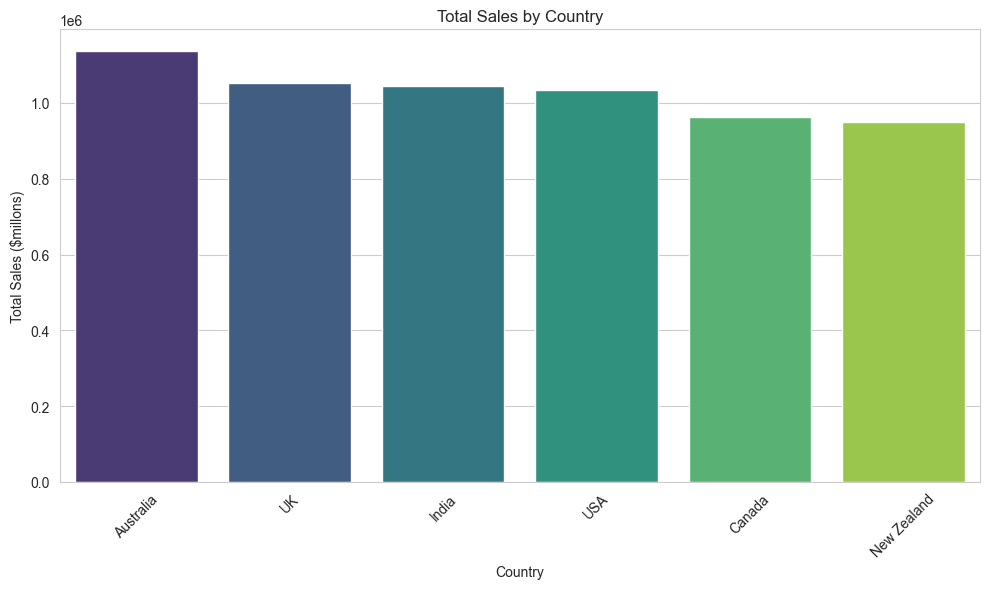

In [7]:
#Group Sales by country
sales_by_country = df.groupby('Country')['Amount'].sum().reset_index()
sales_by_country = sales_by_country.sort_values('Amount', ascending=False)

# Plot the bar chart
sb.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sb.barplot(x='Country', y='Amount', hue='Country', data=sales_by_country, palette='viridis',legend=False)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales ($millons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


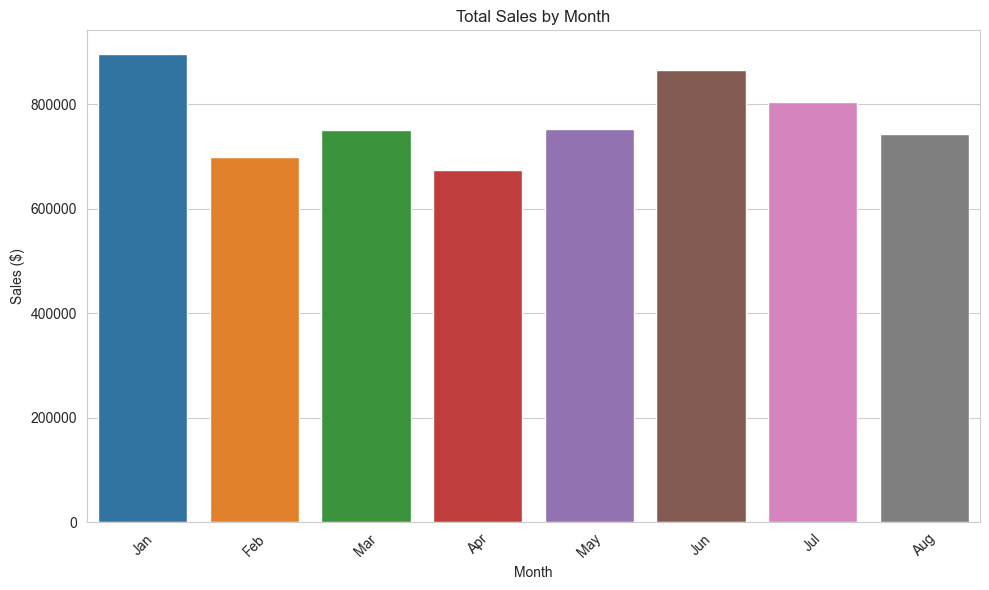

In [8]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Create a Month column (Month-Year style)
df['Month'] = df['Date'].dt.to_period('M')
df['Month'] = df['Date'].dt.strftime('%b')
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

#Places months in the correct order
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

#Plot the bar chart
sb.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sb.barplot(x='Month', y='Amount', hue = 'Month', data=monthly_sales, palette='tab10',legend=False)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

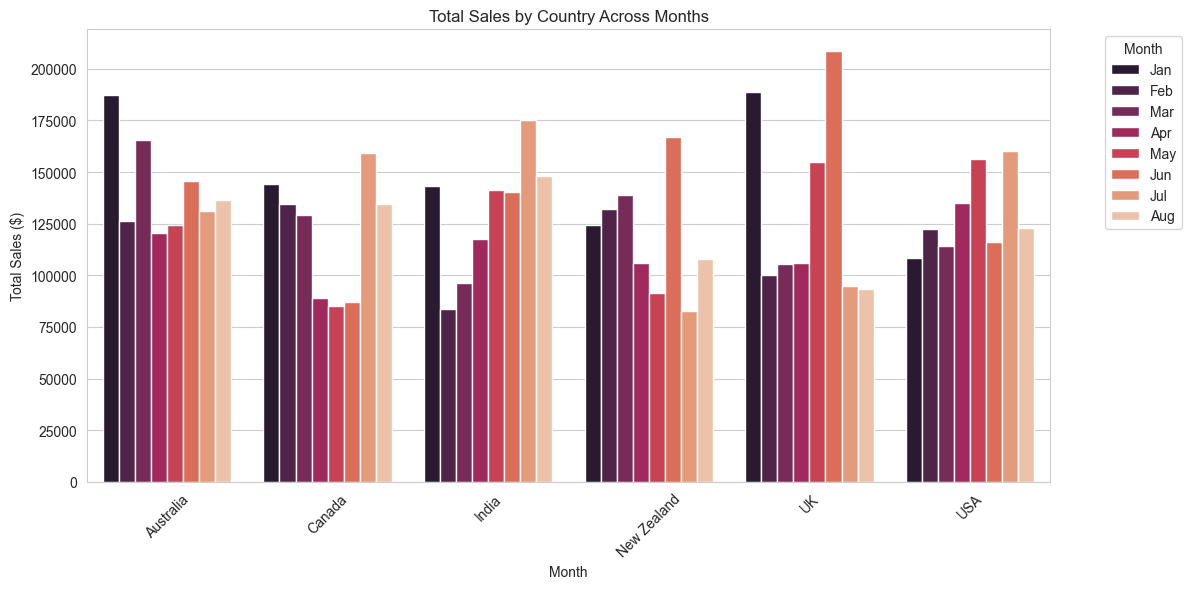

In [10]:
#Set month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

#Group Month/Country by amount sold
grouped = df.groupby(['Month', 'Country'],observed=True)['Amount'].sum().reset_index()


# Plot bar charts
plt.figure(figsize=(12, 6))
sb.set_style('whitegrid')
sb.barplot(data=grouped, x='Country', y='Amount', hue='Month', palette='rocket',)
plt.title('Total Sales by Country Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Month',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()